In [7]:
import pandas as pd
import os
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt


In [8]:
# Chemin du fichier Excel
file_path = "C:\\Users\\MM_DATA\\Desktop\\PIST\\Prediction\\Etat_des_sorties_final.xlsx"

# Lecture du fichier Excel
data = pd.read_excel(file_path)

# Affichage des premières lignes pour vérification
print(data.head())


   N° B.C  N° B.L                                  MARKETER  N° B.E.C  \
0    8943    8355  TOTALENERGIES MARKETING TOGO              30427577   
1    8944    8356  TOTALENERGIES MARKETING TOGO              30427578   
2    8945    8357  TOTALENERGIES MARKETING TOGO              30427578   
3    8946    8358  TOTALENERGIES MARKETING TOGO              30427579   
4    8947    8359  TOTALENERGIES MARKETING TOGO              30427580   

                               DESTINATAIRE  \
0  TOTALENERGIES HIHEATRO                     
1  TOTALENERGIES TEMEDJA                      
2  TOTALENERGIES TEMEDJA                      
3  FAT 3E RI-TEMEDJA                          
4  TOTALENERGIES ANIE 1                       

                                    PRODUIT       DATE  \
0  SUPER                                    2019-01-03   
1  SUPER                                    2019-01-03   
2  GASOIL                                   2019-01-03   
3  GASOIL                                   20

C:\Users\MM_DATA\AppData\Local\Temp\ipykernel_18952\1709827025.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gasoil_data['Mois'] = gasoil_data['DATE'].dt.to_period('M')
C:\Users\MM_DATA\AppData\Local\Temp\ipykernel_18952\1709827025.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super_data['Mois'] = super_data['DATE'].dt.to_period('M')


<Figure size 1200x600 with 0 Axes>

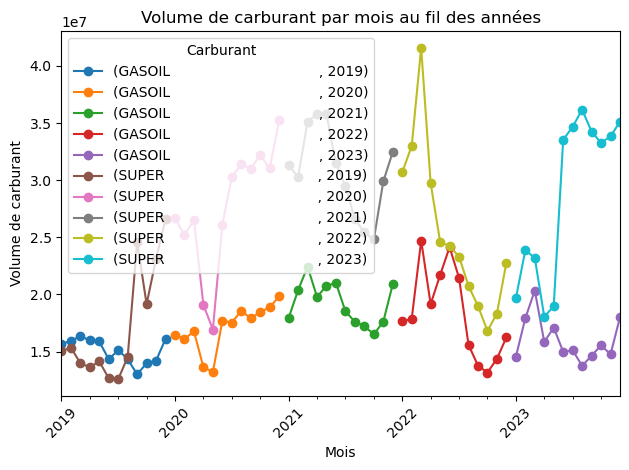

In [9]:
# Filtrer les données pour inclure uniquement les produits "GASOIL" et "SUPER" en tenant compte des espaces supplémentaires
gasoil_data = data[data['PRODUIT'].str.strip() == 'GASOIL']
super_data = data[data['PRODUIT'].str.strip() == 'SUPER']

# Créer une colonne 'Mois' pour regrouper les données par mois
gasoil_data['Mois'] = gasoil_data['DATE'].dt.to_period('M')
super_data['Mois'] = super_data['DATE'].dt.to_period('M')

# Combiner les données des deux carburants en regroupant par mois et année
combined_data = pd.concat([gasoil_data, super_data])
grouped_data = combined_data.groupby(['Mois', combined_data['DATE'].dt.year, 'PRODUIT'])['VOLUME'].sum().unstack().unstack()

# Limiter les données jusqu'en 2023
grouped_data = grouped_data.loc[grouped_data.index.get_level_values('Mois').year <= 2023]

# Vérifier si les données sont vides avant de tracer le graphique
if not grouped_data.empty:
    # Tracer le graphique combiné
    plt.figure(figsize=(12, 6))
    grouped_data.plot(marker='o', linestyle='-')
    plt.title('Volume de carburant par mois au fil des années')
    plt.xlabel('Mois')
    #plt.ylabel('Volume de carburant')
    plt.legend(title='Carburant')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
else:
    print("Aucune donnée disponible pour tracer le graphique.")


C:\Users\MM_DATA\AppData\Local\Temp\ipykernel_18952\1709827025.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gasoil_data['Mois'] = gasoil_data['DATE'].dt.to_period('M')
C:\Users\MM_DATA\AppData\Local\Temp\ipykernel_18952\1709827025.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super_data['Mois'] = super_data['DATE'].dt.to_period('M')


<Figure size 1200x600 with 0 Axes>

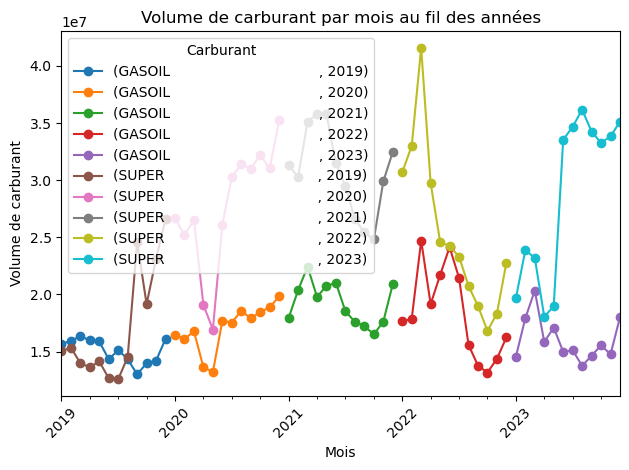

In [14]:
# Filtrer les données pour inclure uniquement les produits "GASOIL" et "SUPER" en tenant compte des espaces supplémentaires
gasoil_data = data[data['PRODUIT'].str.strip() == 'GASOIL']
super_data = data[data['PRODUIT'].str.strip() == 'SUPER']

# Créer une colonne 'Mois' pour regrouper les données par mois
gasoil_data['Mois'] = gasoil_data['DATE'].dt.to_period('M')
super_data['Mois'] = super_data['DATE'].dt.to_period('M')

# Combiner les données des deux carburants en regroupant par mois et année
combined_data = pd.concat([gasoil_data, super_data])
grouped_data = combined_data.groupby(['Mois', combined_data['DATE'].dt.year, 'PRODUIT'])['VOLUME'].sum().unstack().unstack()

# Limiter les données jusqu'en 2023
grouped_data = grouped_data.loc[grouped_data.index.get_level_values('Mois').year <= 2023]

# Vérifier si les données sont vides avant de tracer le graphique
if not grouped_data.empty:
    # Tracer le graphique combiné
    plt.figure(figsize=(12, 6))
    grouped_data.plot(marker='o', linestyle='-')
    plt.title('Volume de carburant par mois au fil des années')
    plt.xlabel('Mois')
    plt.ylabel('Volume de carburant')
    plt.legend(title='Carburant')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
else:
    print("Aucune donnée disponible pour tracer le graphique.")


C:\Users\MM_DATA\AppData\Local\Temp\ipykernel_18952\1268809841.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gasoil_data['Mois'] = gasoil_data['DATE'].dt.to_period('M')
C:\Users\MM_DATA\AppData\Local\Temp\ipykernel_18952\1268809841.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super_data['Mois'] = super_data['DATE'].dt.to_period('M')


<Figure size 1200x600 with 0 Axes>

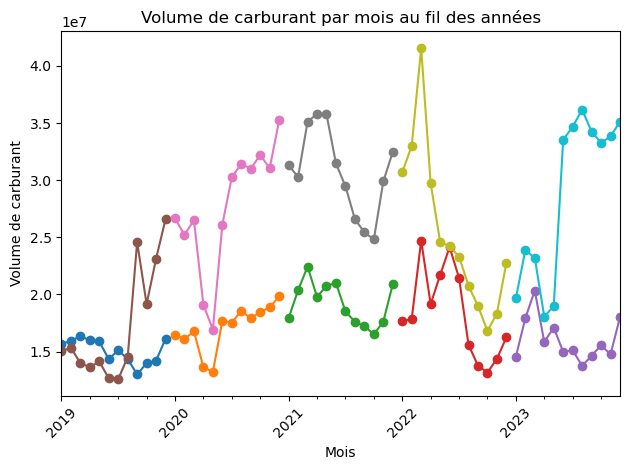

In [15]:
import matplotlib.pyplot as plt

# Filtrer les données pour inclure uniquement les produits "GASOIL" et "SUPER" en tenant compte des espaces supplémentaires
gasoil_data = data[data['PRODUIT'].str.strip() == 'GASOIL']
super_data = data[data['PRODUIT'].str.strip() == 'SUPER']

# Créer une colonne 'Mois' pour regrouper les données par mois pour le gasoil
gasoil_data['Mois'] = gasoil_data['DATE'].dt.to_period('M')
# Créer une colonne 'Mois' pour regrouper les données par mois pour le super
super_data['Mois'] = super_data['DATE'].dt.to_period('M')

# Combiner les données des deux carburants en regroupant par mois et année
combined_data = pd.concat([gasoil_data, super_data])
# Grouper les données par mois, année et produit, puis calculer la somme des volumes de carburant
grouped_data = combined_data.groupby(['Mois', combined_data['DATE'].dt.year, 'PRODUIT'])['VOLUME'].sum().unstack().unstack()

# Limiter les données jusqu'en 2023 en filtrant sur l'index des mois
grouped_data = grouped_data.loc[grouped_data.index.get_level_values('Mois').year <= 2023]

# Vérifier si les données sont vides avant de tracer le graphique
if not grouped_data.empty:
    # Tracer le graphique combiné
    plt.figure(figsize=(12, 6))
    # Tracer les données avec des couleurs automatiques et sans légende
    grouped_data.plot(marker='o', linestyle='-', legend=False)
    # Définir le titre du graphique
    plt.title('Volume de carburant par mois au fil des années')
    # Définir le label de l'axe x
    plt.xlabel('Mois')
    # Définir le label de l'axe y
    plt.ylabel('Volume de carburant')
    # Faire pivoter les labels de l'axe x de 45 degrés pour une meilleure lisibilité
    plt.xticks(rotation=45)
    # Ajuster la disposition du graphique pour s'assurer que tout est visible
    plt.tight_layout()
    # Afficher le graphique
    plt.show()
else:
    # Afficher un message si aucune donnée n'est disponible pour tracer le graphique
    print("Aucune donnée disponible pour tracer le graphique.")


C:\Users\MM_DATA\AppData\Local\Temp\ipykernel_18952\3554383548.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gasoil_data['Mois'] = gasoil_data['DATE'].dt.to_period('M')
C:\Users\MM_DATA\AppData\Local\Temp\ipykernel_18952\3554383548.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super_data['Mois'] = super_data['DATE'].dt.to_period('M')


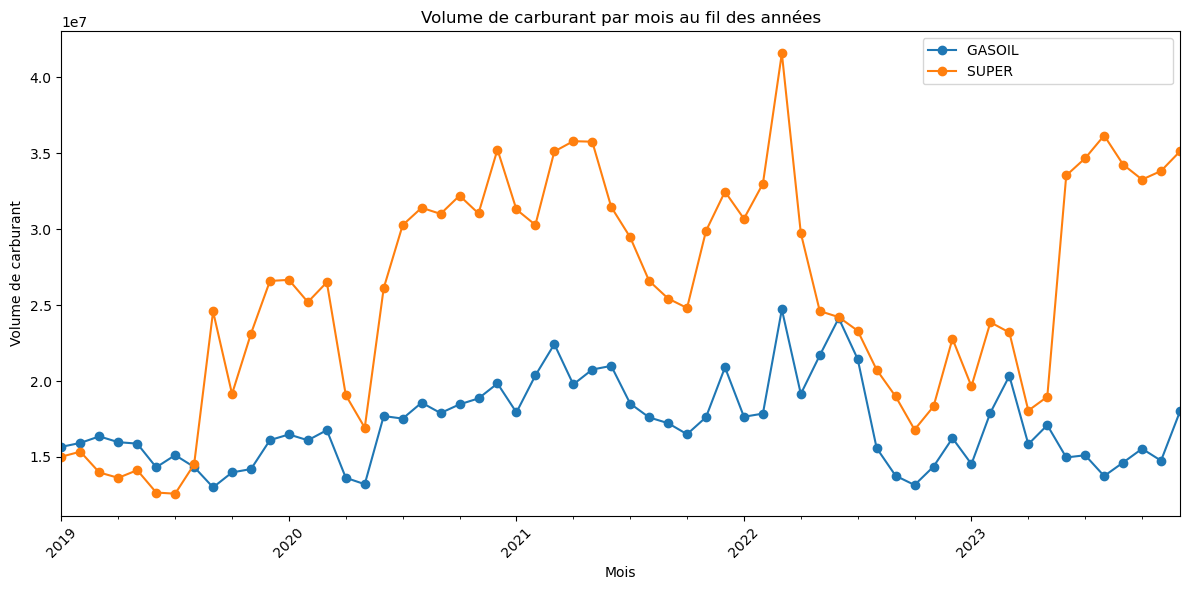

In [26]:
import matplotlib.pyplot as plt

# Filtrer les données pour inclure uniquement les produits "GASOIL" et "SUPER" en tenant compte des espaces supplémentaires
gasoil_data = data[data['PRODUIT'].str.strip() == 'GASOIL']
super_data = data[data['PRODUIT'].str.strip() == 'SUPER']

# Créer une colonne 'Mois' pour regrouper les données par mois pour le gasoil
gasoil_data['Mois'] = gasoil_data['DATE'].dt.to_period('M')
# Créer une colonne 'Mois' pour regrouper les données par mois pour le super
super_data['Mois'] = super_data['DATE'].dt.to_period('M')

# Combiner les données des deux carburants en regroupant par mois et année
combined_data = pd.concat([gasoil_data, super_data])

# Utiliser pivot_table pour réorganiser les données
pivot_data = combined_data.pivot_table(index='Mois', columns='PRODUIT', values='VOLUME', aggfunc='sum')

# Limiter les données jusqu'en 2023
pivot_data = pivot_data[pivot_data.index.year <= 2023]

# Vérifier si les données sont vides avant de tracer le graphique
if not pivot_data.empty:
    # Tracer le graphique combiné
    plt.figure(figsize=(12, 6))
    # Tracer les données avec des couleurs distinctes
    pivot_data.plot(marker='o', linestyle='-', ax=plt.gca())
    # Définir le titre du graphique
    plt.title('Volume de carburant par mois au fil des années')
    # Définir le label de l'axe x
    plt.xlabel('Mois')
    # Définir le label de l'axe y
    plt.ylabel('Volume de carburant')
    # Faire pivoter les labels de l'axe x de 45 degrés pour une meilleure lisibilité
    plt.xticks(rotation=45)
    # Afficher la légende
    plt.legend()
    # Ajuster la disposition du graphique pour s'assurer que tout est visible
    plt.tight_layout()
    # Afficher le graphique
    plt.show()
else:
    # Afficher un message si aucune donnée n'est disponible pour tracer le graphique
    print("Aucune donnée disponible pour tracer le graphique.")


C:\Users\MM_DATA\AppData\Local\Temp\ipykernel_18952\1180582815.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gasoil_data['Mois'] = gasoil_data['DATE'].dt.to_period('M')
C:\Users\MM_DATA\AppData\Local\Temp\ipykernel_18952\1180582815.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super_data['Mois'] = super_data['DATE'].dt.to_period('M')


<Figure size 1200x600 with 0 Axes>

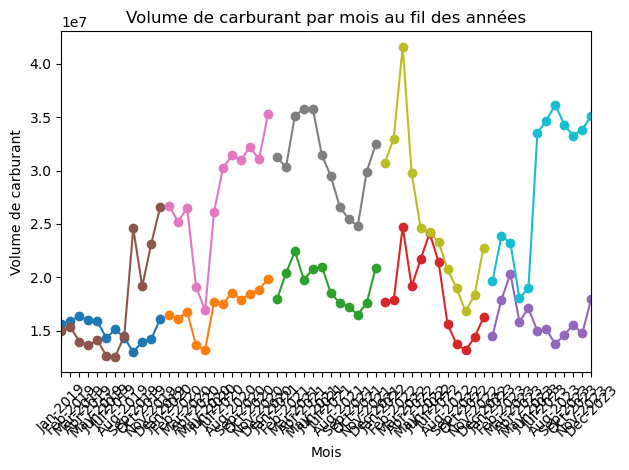

In [31]:
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.dates import MonthLocator, DateFormatter

# Suppose que vous avez déjà chargé vos données et effectué les opérations de filtrage et de regroupement

# Filtrer les données pour inclure uniquement les produits "GASOIL" et "SUPER" en tenant compte des espaces supplémentaires
gasoil_data = data[data['PRODUIT'].str.strip() == 'GASOIL']
super_data = data[data['PRODUIT'].str.strip() == 'SUPER']

# Créer une colonne 'Mois' pour regrouper les données par mois pour le gasoil
gasoil_data['Mois'] = gasoil_data['DATE'].dt.to_period('M')
# Créer une colonne 'Mois' pour regrouper les données par mois pour le super
super_data['Mois'] = super_data['DATE'].dt.to_period('M')

# Combiner les données des deux carburants en regroupant par mois et année
combined_data = pd.concat([gasoil_data, super_data])
# Grouper les données par mois, année et produit, puis calculer la somme des volumes de carburant
grouped_data = combined_data.groupby(['Mois', combined_data['DATE'].dt.year, 'PRODUIT'])['VOLUME'].sum().unstack().unstack()

# Limiter les données jusqu'en 2023 en filtrant sur l'index des mois
grouped_data = grouped_data.loc[grouped_data.index.get_level_values('Mois').year <= 2023]

# Vérifier si les données sont vides avant de tracer le graphique
if not grouped_data.empty:
    # Tracer le graphique combiné
    plt.figure(figsize=(12, 6))
    # Tracer les données avec des couleurs automatiques et sans légende
    grouped_data.plot(marker='o', linestyle='-', legend=False)
    # Définir le titre du graphique
    plt.title('Volume de carburant par mois au fil des années')
    # Définir le label de l'axe x
    plt.xlabel('Mois')
    # Définir le label de l'axe y
    plt.ylabel('Volume de carburant')
    # Faire pivoter les labels de l'axe x de 45 degrés pour une meilleure lisibilité
    plt.xticks(rotation=45)
    
    # Filtrer les dates pour n'afficher que celles après 2019
    filtered_dates = grouped_data.index.get_level_values('Mois').to_timestamp().year >= 2019
    filtered_dates = grouped_data.index.get_level_values('Mois')[filtered_dates]
    plt.xticks(ticks=filtered_dates, labels=filtered_dates.strftime('%b-%Y'))
    
    # Ajuster la disposition du graphique pour s'assurer que tout est visible
    plt.tight_layout()
    # Afficher le graphique
    plt.show()
else:
    # Afficher un message si aucune donnée n'est disponible pour tracer le graphique
    print("Aucune donnée disponible pour tracer le graphique.")


C:\Users\MM_DATA\AppData\Local\Temp\ipykernel_18952\2903426142.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gasoil_data['Mois'] = gasoil_data['DATE'].dt.to_period('M')
C:\Users\MM_DATA\AppData\Local\Temp\ipykernel_18952\2903426142.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super_data['Mois'] = super_data['DATE'].dt.to_period('M')


<Figure size 1200x600 with 0 Axes>

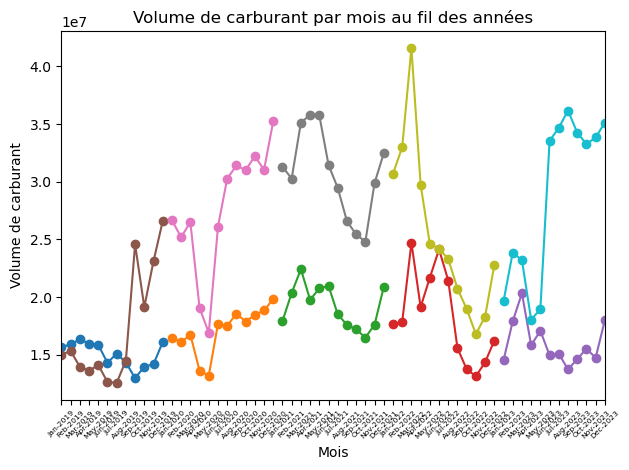

In [35]:
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.dates import MonthLocator, DateFormatter

# Suppose que vous avez déjà chargé vos données et effectué les opérations de filtrage et de regroupement

# Filtrer les données pour inclure uniquement les produits "GASOIL" et "SUPER" en tenant compte des espaces supplémentaires
gasoil_data = data[data['PRODUIT'].str.strip() == 'GASOIL']
super_data = data[data['PRODUIT'].str.strip() == 'SUPER']

# Créer une colonne 'Mois' pour regrouper les données par mois pour le gasoil
gasoil_data['Mois'] = gasoil_data['DATE'].dt.to_period('M')
# Créer une colonne 'Mois' pour regrouper les données par mois pour le super
super_data['Mois'] = super_data['DATE'].dt.to_period('M')

# Combiner les données des deux carburants en regroupant par mois et année
combined_data = pd.concat([gasoil_data, super_data])
# Grouper les données par mois, année et produit, puis calculer la somme des volumes de carburant
grouped_data = combined_data.groupby(['Mois', combined_data['DATE'].dt.year, 'PRODUIT'])['VOLUME'].sum().unstack().unstack()

# Limiter les données jusqu'en 2023 en filtrant sur l'index des mois
grouped_data = grouped_data.loc[grouped_data.index.get_level_values('Mois').year <= 2023]

# Vérifier si les données sont vides avant de tracer le graphique
if not grouped_data.empty:
    # Tracer le graphique combiné
    plt.figure(figsize=(12, 6))
    # Tracer les données avec des couleurs automatiques et sans légende
    grouped_data.plot(marker='o', linestyle='-', legend=False)
    # Définir le titre du graphique
    plt.title('Volume de carburant par mois au fil des années')
    # Définir le label de l'axe x
    plt.xlabel('Mois')
    # Définir le label de l'axe y
    plt.ylabel('Volume de carburant')
    # Faire pivoter les labels de l'axe x de 45 degrés pour une meilleure lisibilité
    plt.xticks(rotation=45)
    
    # Filtrer les dates pour n'afficher que celles après 2019
    filtered_dates = grouped_data.index.get_level_values('Mois').to_timestamp().year >= 2019
    filtered_dates = grouped_data.index.get_level_values('Mois')[filtered_dates]
    plt.xticks(ticks=filtered_dates, labels=filtered_dates.strftime('%b-%Y'), fontsize=5.5)  # Réduire la taille de la police
    
    # Ajuster la disposition du graphique pour s'assurer que tout est visible
    plt.tight_layout()
    # Afficher le graphique
    plt.show()
else:
    # Afficher un message si aucune donnée n'est disponible pour tracer le graphique
    print("Aucune donnée disponible pour tracer le graphique.")


C:\Users\MM_DATA\AppData\Local\Temp\ipykernel_18952\3968077671.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gasoil_data['Mois'] = gasoil_data['DATE'].dt.to_period('M')
C:\Users\MM_DATA\AppData\Local\Temp\ipykernel_18952\3968077671.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super_data['Mois'] = super_data['DATE'].dt.to_period('M')


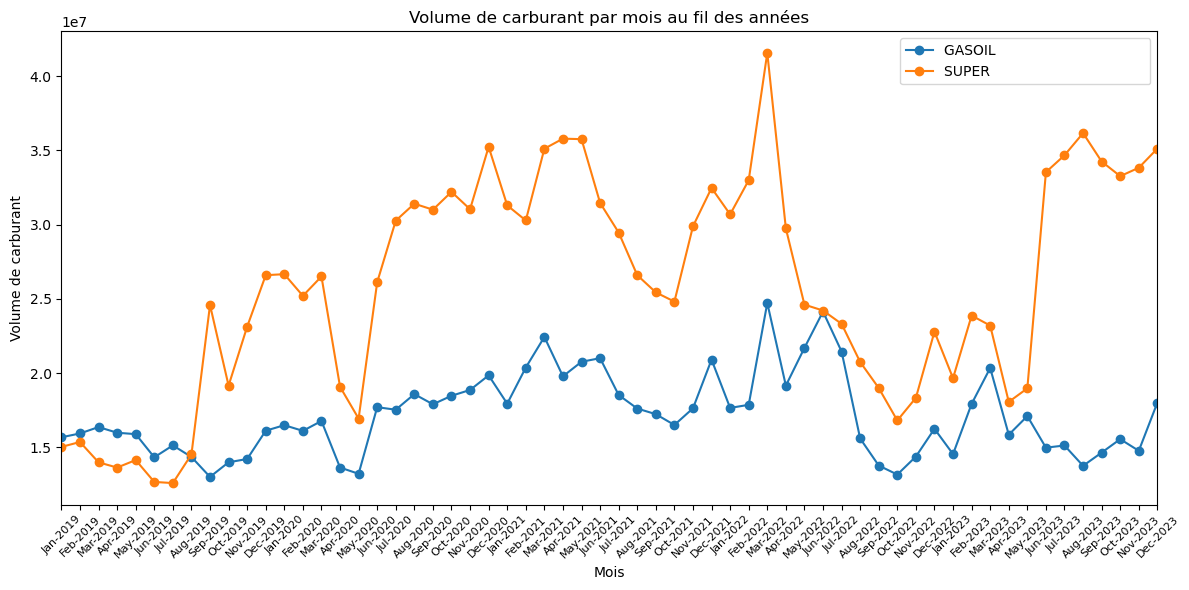

In [36]:
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.dates import MonthLocator, DateFormatter

# Filtrer les données pour inclure uniquement les produits "GASOIL" et "SUPER" en tenant compte des espaces supplémentaires
gasoil_data = data[data['PRODUIT'].str.strip() == 'GASOIL']
super_data = data[data['PRODUIT'].str.strip() == 'SUPER']

# Créer une colonne 'Mois' pour regrouper les données par mois pour le gasoil
gasoil_data['Mois'] = gasoil_data['DATE'].dt.to_period('M')
# Créer une colonne 'Mois' pour regrouper les données par mois pour le super
super_data['Mois'] = super_data['DATE'].dt.to_period('M')

# Combiner les données des deux carburants en regroupant par mois et année
combined_data = pd.concat([gasoil_data, super_data])

# Utiliser pivot_table pour réorganiser les données
pivot_data = combined_data.pivot_table(index='Mois', columns='PRODUIT', values='VOLUME', aggfunc='sum')

# Limiter les données jusqu'en 2023
pivot_data = pivot_data[pivot_data.index.year <= 2023]

# Vérifier si les données sont vides avant de tracer le graphique
if not pivot_data.empty:
    # Tracer le graphique combiné
    plt.figure(figsize=(12, 6))
    # Tracer les données avec des couleurs distinctes
    pivot_data.plot(marker='o', linestyle='-', ax=plt.gca())
    # Définir le titre du graphique
    plt.title('Volume de carburant par mois au fil des années')
    # Définir le label de l'axe x
    plt.xlabel('Mois')
    # Définir le label de l'axe y
    plt.ylabel('Volume de carburant')
    # Faire pivoter les labels de l'axe x de 45 degrés pour une meilleure lisibilité
    plt.xticks(rotation=45)
    
    # Filtrer les dates pour n'afficher que celles après 2019
    filtered_dates = pivot_data.index.year >= 2019
    filtered_dates = pivot_data.index[filtered_dates]
    plt.xticks(ticks=filtered_dates, labels=filtered_dates.strftime('%b-%Y'), fontsize=8)  # Réduire la taille de la police
    
    # Afficher la légende
    plt.legend()
    # Ajuster la disposition du graphique pour s'assurer que tout est visible
    plt.tight_layout()
    # Afficher le graphique
    plt.show()
else:
    # Afficher un message si aucune donnée n'est disponible pour tracer le graphique
    print("Aucune donnée disponible pour tracer le graphique.")


C:\Users\MM_DATA\AppData\Local\Temp\ipykernel_18952\3763930701.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gasoil_data['Mois'] = gasoil_data['DATE'].dt.to_period('M')
C:\Users\MM_DATA\AppData\Local\Temp\ipykernel_18952\3763930701.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super_data['Mois'] = super_data['DATE'].dt.to_period('M')


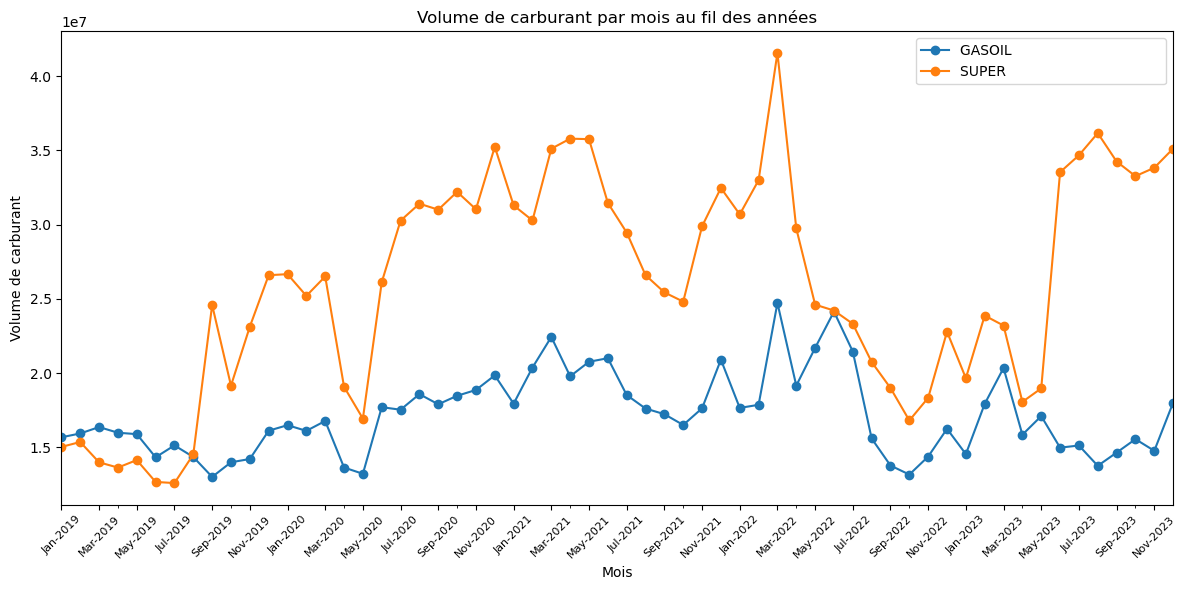

In [38]:
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.dates import MonthLocator, DateFormatter

# Filtrer les données pour inclure uniquement les produits "GASOIL" et "SUPER" en tenant compte des espaces supplémentaires
gasoil_data = data[data['PRODUIT'].str.strip() == 'GASOIL']
super_data = data[data['PRODUIT'].str.strip() == 'SUPER']

# Créer une colonne 'Mois' pour regrouper les données par mois pour le gasoil
gasoil_data['Mois'] = gasoil_data['DATE'].dt.to_period('M')
# Créer une colonne 'Mois' pour regrouper les données par mois pour le super
super_data['Mois'] = super_data['DATE'].dt.to_period('M')

# Combiner les données des deux carburants en regroupant par mois et année
combined_data = pd.concat([gasoil_data, super_data])

# Utiliser pivot_table pour réorganiser les données
pivot_data = combined_data.pivot_table(index='Mois', columns='PRODUIT', values='VOLUME', aggfunc='sum')

# Limiter les données jusqu'en 2023
pivot_data = pivot_data[pivot_data.index.year <= 2023]

# Vérifier si les données sont vides avant de tracer le graphique
if not pivot_data.empty:
    # Tracer le graphique combiné
    plt.figure(figsize=(12, 6))
    # Tracer les données avec des couleurs distinctes
    pivot_data.plot(marker='o', linestyle='-', ax=plt.gca())
    # Définir le titre du graphique
    plt.title('Volume de carburant par mois au fil des années')
    # Définir le label de l'axe x
    plt.xlabel('Mois')
    # Définir le label de l'axe y
    plt.ylabel('Volume de carburant')
    # Faire pivoter les labels de l'axe x de 45 degrés pour une meilleure lisibilité
    plt.xticks(rotation=45)
    
    # Filtrer les dates pour n'afficher que celles après 2019
    filtered_dates = pivot_data.index.year >= 2019
    filtered_dates = pivot_data.index[filtered_dates]
    # Afficher un mois sur deux en ajustant le MonthLocator
    plt.gca().xaxis.set_major_locator(MonthLocator(interval=2))
    plt.xticks(ticks=filtered_dates[::2], labels=filtered_dates[::2].strftime('%b-%Y'), fontsize=8)  # Réduire la taille de la police et afficher un mois sur deux
    
    # Afficher la légende
    plt.legend()
    # Ajuster la disposition du graphique pour s'assurer que tout est visible
    plt.tight_layout()
    # Afficher le graphique
    plt.show()
else:
    # Afficher un message si aucune donnée n'est disponible pour tracer le graphique
    print("Aucune donnée disponible pour tracer le graphique.")
